In [1]:
import numpy as np
import pandas as pd

In [2]:
# cargar dataset
# dataset link: https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv
dataset_path = "/home/david/ML_DL/datasets/Novel Corona Virus 2019/covid_19_data.csv"
df = pd.read_csv(dataset_path)

In [3]:
# cambiar el tipo de dato de la columna de ObservationDate
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])

In [4]:
# elegir solo algunas columnas
df.drop(labels=["SNo", "Province/State", "Last Update"], axis=1, inplace=True)
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


**En qué país hay más ocurrencias de COVID-19**

In [6]:
df.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False)

Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

**Agrupado por países como una serie de tiempo**

In [8]:
df_time = df.groupby(["Country/Region", pd.Grouper(key="ObservationDate", freq="1D")]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [11]:
# obtener muestra de Francia
df_france = df_time.loc["France", :]
df_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
2020-01-27,3.0,0.0,0.0
2020-01-28,4.0,0.0,0.0
...,...,...,...
2021-05-25,5670486.0,109040.0,386798.0
2021-05-26,5683143.0,109185.0,388128.0
2021-05-27,5697076.0,109327.0,389105.0


**Graficar la muestra**

In [13]:
import matplotlib.pyplot as plt

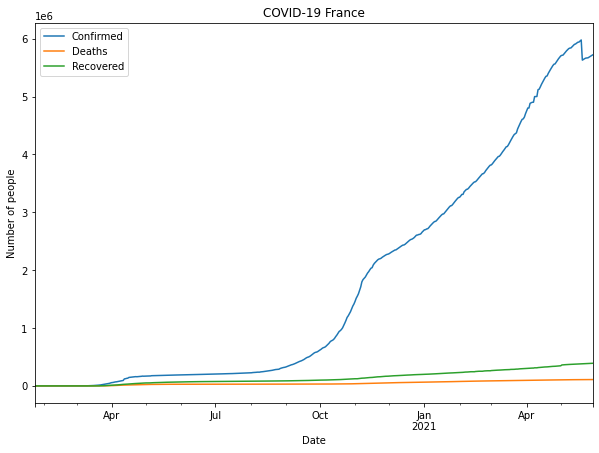

In [14]:
# graficar la muestra
df_france.plot(figsize=(10, 7), title="COVID-19 France")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.show()

**Tuneando la gráfica**

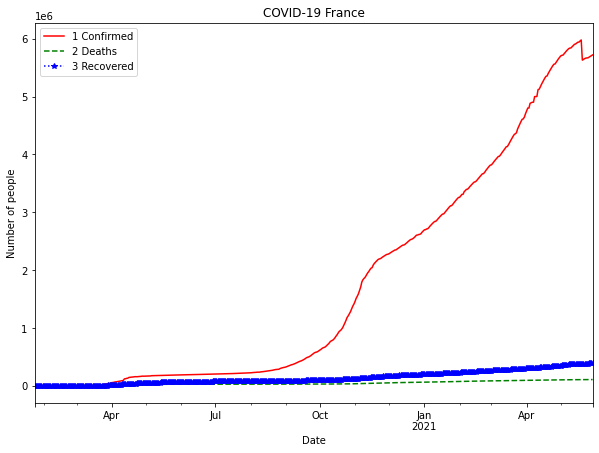

In [15]:
ax = df_france.plot(
    figsize=(10, 7), 
    legend=False,
    title="COVID-19 France",
    style=["r-", "g--", "b:*"]
)
ax.legend(["1 Confirmed", "2 Deaths", "3 Recovered"])
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.show()

In [16]:
# obtener muestra de Mexico
df_mex = df_time.loc["Mexico", :]
df_mex

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,4.0,0.0,0.0
2020-03-01,5.0,0.0,0.0
2020-03-02,5.0,0.0,0.0
...,...,...,...
2021-05-25,2399790.0,221960.0,1917958.0
2021-05-26,2402722.0,222232.0,1919821.0
2021-05-27,2405772.0,222661.0,1921510.0


In [17]:
df_mx_monthly = df_mex.resample("M").max()
df_mx_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.0,0.0,0.0
2020-02-29,4.0,0.0,0.0
2020-03-31,1094.0,28.0,35.0
2020-04-30,19224.0,1859.0,11423.0
2020-05-31,90664.0,9930.0,63772.0
2020-06-30,226089.0,27769.0,174538.0
2020-07-31,424637.0,46688.0,327115.0
2020-08-31,599560.0,64414.0,496222.0
2020-09-30,743216.0,77646.0,628007.0


<AxesSubplot:xlabel='ObservationDate'>

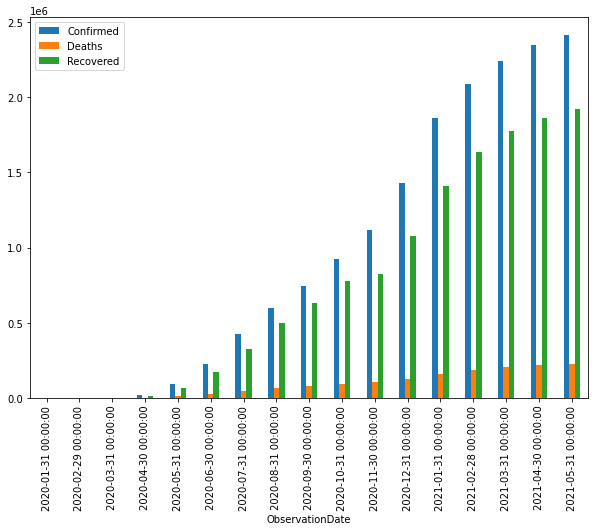

In [19]:
# crear histograma
df_mx_monthly.plot(figsize=(10, 7), kind="bar")

<AxesSubplot:xlabel='ObservationDate'>

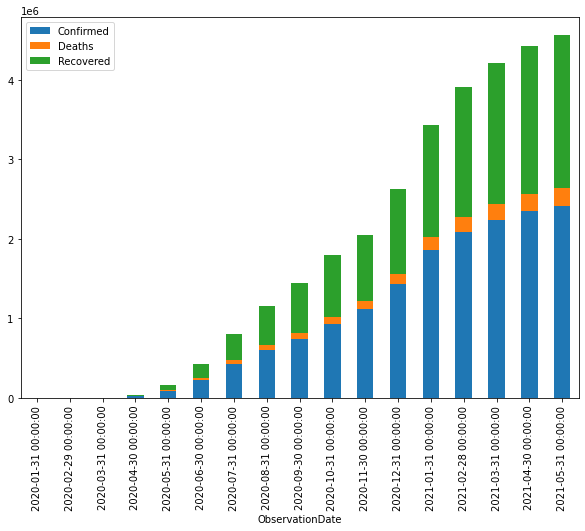

In [20]:
# verlo en forma de stack
df_mx_monthly.plot(figsize=(10, 7), kind="bar", stacked=True)

In [21]:
# agregar una columna para los casos en tratamiento
df_mx_monthly["Traitment"] = df_mx_monthly["Confirmed"] - df_mx_monthly["Deaths"] - df_mx_monthly["Recovered"]
df_mx_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,0.0,0.0,0.0,0.0
2020-02-29,4.0,0.0,0.0,4.0
2020-03-31,1094.0,28.0,35.0,1031.0
2020-04-30,19224.0,1859.0,11423.0,5942.0
2020-05-31,90664.0,9930.0,63772.0,16962.0
2020-06-30,226089.0,27769.0,174538.0,23782.0
2020-07-31,424637.0,46688.0,327115.0,50834.0
2020-08-31,599560.0,64414.0,496222.0,38924.0
2020-09-30,743216.0,77646.0,628007.0,37563.0


array([<AxesSubplot:ylabel='2021-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2021-02-28 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>], dtype=object)

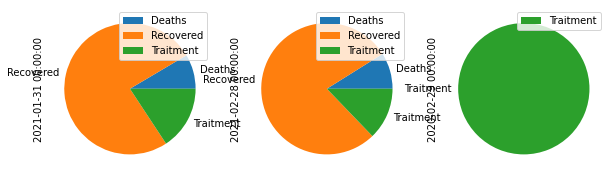

In [30]:
# crear gráficas de pastel con algunos meses, para el estado de los casos que han sido confirmados
df_mx_monthly_sample = df_mx_monthly.sample(3)
df_mx_monthly_sample[["Deaths", "Recovered", "Traitment"]].T.plot(figsize=(10, 7), kind="pie", subplots=True)


<AxesSubplot:>

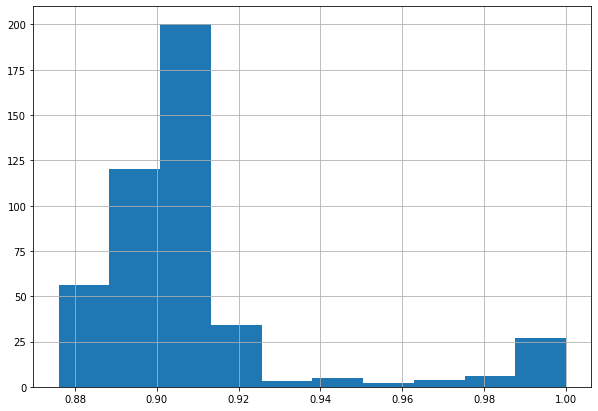

In [32]:
# ver la tasa de supervivencia
df_mex["rate"] = 1 - df_mex["Deaths"] / df_mex["Confirmed"]
df_mex["rate"].hist(figsize=(10, 7), bins=10)

<AxesSubplot:ylabel='Density'>

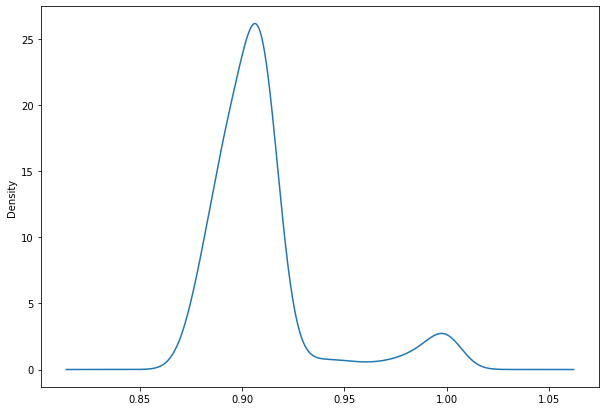

In [33]:
# ver la tasa de distribución
df_mex["rate"].plot(kind="kde", figsize=(10, 7))